In [1]:
import pandas as pd
from numpy import array
import datetime
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
# define documents


Using TensorFlow backend.


In [2]:
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: {:.2%}'.format(accuracy))

[[11, 41], [46, 24], [40, 45], [4, 24], [8], [23], [8, 45], [26, 46], [8, 24], [13, 28, 41, 25]]
[[11 41  0  0]
 [46 24  0  0]
 [40 45  0  0]
 [ 4 24  0  0]
 [ 8  0  0  0]
 [23  0  0  0]
 [ 8 45  0  0]
 [26 46  0  0]
 [ 8 24  0  0]
 [13 28 41 25]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 70.00%


In [3]:
df = pd.read_csv('docs.csv').sample(frac=1).reset_index(drop=True)
df['date'] = df['rated'].apply(lambda x: datetime.datetime.strptime(x[:19],"%Y-%m-%d %H:%M:%S"))
df = df[df['date'] > datetime.datetime(2018,6,1,0,0,0)].reset_index(drop=True)
print(df.shape)
y = df['relevant']
df.head()

(1984, 13)


,Unnamed: 0,UT_id,authors,content,first_author,id,rated,relevant,tag,title,wosarticle__de,wosarticle__wc,date
0,1035,WOS:000375886300018,"Chaudhary, A, Kastner, T",Agricultural land use to meet the demands of a...,"Chaudhary, A",670243,2018-09-21 04:09:24.402668+00:00,1,753,Land use biodiversity impacts embodied in inte...,Biodiversity; Agriculture; Global trade; Land ...,['Environmental Sciences; Environmental Studie...,2018-09-21 04:09:24
1,2316,WOS:000281997700017,"Clarke, ND",The conversion of biomass to fuels and chemica...,"Clarke, ND",323017,2018-09-19 16:14:09.968943+00:00,1,753,Protein engineering for bioenergy and biomass-...,NaN,['Biochemistry & Molecular Biology; Cell Biolo...,2018-09-19 16:14:09
2,2605,WOS:000353755000040,"Gliedt, T, Hoicka, CE",Due to its significant carbon footprint and co...,"Gliedt, T",739751,2018-09-21 15:49:19.018006+00:00,1,760,Energy upgrades as financial or strategic inve...,Energy Star; Energy efficiency and management;...,"['Energy & Fuels; Engineering, Chemical']",2018-09-21 15:49:19
3,116,WOS:000347763100022,"Jaafari, A, Najafi, A, Najafi, A, Melon, MG",The importance of environmental and economical...,"Jaafari, A",87897,2018-09-19 14:17:12.960442+00:00,1,753,Decision-making for the selection of a best wo...,ANP; BOCR; Caspian Forest; Forest harvesting; ...,['Forestry'],2018-09-19 14:17:12
4,1887,WOS:000364520700001,"Schutte, SA",Indonesia has been struggling to reform its co...,"Schutte, SA",316218,2018-09-20 11:55:53.263925+00:00,0,760,Keeping the New Broom Clean Lessons in Human R...,civil service reform; Indonesia; anti-corrupti...,['Anthropology; Asian Studies'],2018-09-20 11:55:53


In [9]:
docs = array(df['content'])
labels = array(df['relevant'])

vocab_size = 15000
encoded_docs = [one_hot(d, vocab_size) for d in docs]

# pad documents to a max length of 500 words
max_length = 500
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# define the model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: {:.2%}'.format(accuracy))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 100)          1500000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 50000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 50001     
Total params: 1,550,001
Trainable params: 1,550,001
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 100.00%


In [5]:
docs = array(df['content'])
labels = array(df['relevant'])

vocab_size = 10000
encoded_docs = [one_hot(d, vocab_size) for d in docs]

# pad documents to a max length of 4 words
max_length = 500
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')


import numpy as np
import sklearn.model_selection
X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(padded_docs, labels, random_state=1)

len(X_train)



1488

In [6]:
X_train.shape

(1488, 500)

In [13]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 300, input_length=max_length))
model.add(Flatten())
model.add(Dense(16, input_dim=200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())
# fit the model
history = model.fit(X_train, y_train, epochs=50, verbose=0,validation_data=(X_test, y_test))
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: {:.2%}'.format(accuracy))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 300)          3000000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 150000)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                2400016   
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 5,400,033
Trainable params: 5,400,033
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 84.27%


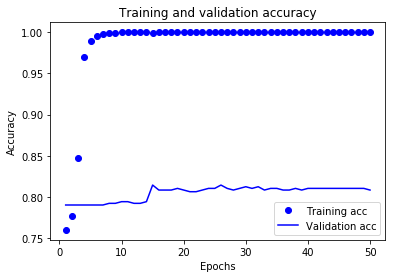

In [17]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




In [8]:
model = Sequential() 
model.add(Embedding(vocab_size, 300, input_length=max_length)) 
model.add(LSTM(100)) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 

print(model.summary())
# fit the model
model.fit(X_train, y_train, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: {:.2%}'.format(accuracy))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 300)          3000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 3,160,501
Trainable params: 3,160,501
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 79.03%


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,200,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(df['content'], df['relevant'], random_state=1)

max_words = 50000
max_len = 1047
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)


In [36]:
lens = max([len(x.split()) for x in list(df['content'])])
lens

1047

In [42]:

model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

history = model.fit(sequences_matrix,y_train,batch_size=128,epochs=10)
          #validation_split=0.2)#,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 1047)              0         
_________________________________________________________________
embedding_17 (Embedding)     (None, 1047, 200)         10000000  
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                67840     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

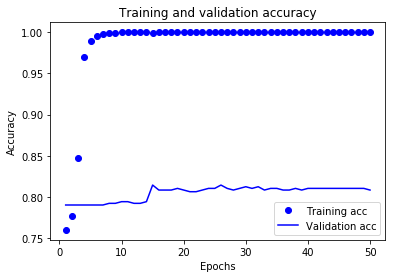

496/496 [==============================] - 2s 4ms/step
Test set
  Loss: 0.861
  Accuracy: 0.845


In [41]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)


accr = model.evaluate(test_sequences_matrix,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

